# Загрузка данных

In [1]:
import pandas as pd
file_encoding = 'cp1252' 
data = pd.read_csv('D:\\М.Тех_Данные_к_ТЗ_DS.csv',encoding='cp1251', sep = ',')

In [2]:
data

,"Количество больничных дней,""Возраст"",""Пол"""
0,"5,39,""Ж"""
1,"4,54,""М"""
2,"4,26,""М"""
3,"5,42,""М"""
4,"4,29,""М"""
...,...
232,"5,30,""М"""
233,"4,36,""Ж"""
234,"2,60,""Ж"""
235,"2,44,""Ж"""


### Преобразование столбцов

In [3]:
data['Кол-во больничных дней'] = data['Количество больничных дней,"Возраст","Пол"'].str.split(',', expand=True)[0]
data['Возраст'] = data['Количество больничных дней,"Возраст","Пол"'].str.split(',', expand=True)[1]
data['Пол'] = data['Количество больничных дней,"Возраст","Пол"'].str.split(',', expand=True)[2]
data.drop(columns=['Количество больничных дней,"Возраст","Пол"'], inplace=True)

In [4]:
data

,Кол-во больничных дней,Возраст,Пол
0,5,39,"""Ж"""
1,4,54,"""М"""
2,4,26,"""М"""
3,5,42,"""М"""
4,4,29,"""М"""
...,...,...,...
232,5,30,"""М"""
233,4,36,"""Ж"""
234,2,60,"""Ж"""
235,2,44,"""Ж"""


# Задание: проверить гипотезы ввида:
## 1. "Мужчины пропускают в течение года более 2 рабочих дней (work_days) по болезни значимо чаще женщин"
## 2. "Работники старше 35 лет (age) пропускают в течение года более 2 рабочих дней (work_days) по болезни значимо чаще своих более молодых коллег"

In [5]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 237 entries, 0 to 236
Data columns (total 3 columns):
 #   Column                  Non-Null Count  Dtype 
---  ------                  --------------  ----- 
 0   Кол-во больничных дней  237 non-null    object
 1   Возраст                 237 non-null    object
 2   Пол                     237 non-null    object
dtypes: object(3)
memory usage: 5.7+ KB


### Преобразование типов данных

In [6]:
data['Возраст'] = data['Возраст'].astype(int)
data['Кол-во больничных дней'] = data['Кол-во больничных дней'].astype(int)
data['Пол'] = data['Пол'].astype(str)

In [7]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 237 entries, 0 to 236
Data columns (total 3 columns):
 #   Column                  Non-Null Count  Dtype 
---  ------                  --------------  ----- 
 0   Кол-во больничных дней  237 non-null    int32 
 1   Возраст                 237 non-null    int32 
 2   Пол                     237 non-null    object
dtypes: int32(2), object(1)
memory usage: 3.8+ KB


### Анализ пропущенных значений в данных

In [10]:
data.isna().sum()

Кол-во больничных дней    0
Возраст                   0
Пол                       0
dtype: int64

### Визуализация данных генеральной совокупности

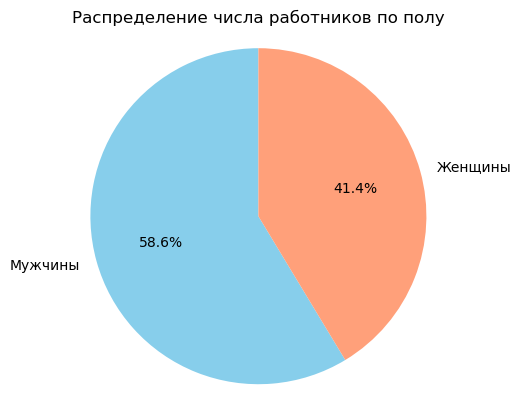

In [12]:
import matplotlib.pyplot as plt

labels = ['Мужчины', 'Женщины']
count_male = data[data['Пол'] == '"М"'].count()[0]
count_female = data[data['Пол'] == '"Ж"'].count()[0]
sizes = [count_male, count_female]


fig, ax = plt.subplots()
ax.pie(sizes, labels=labels, autopct='%1.1f%%', startangle=90, colors=['skyblue', 'lightsalmon'])
ax.axis('equal')  

plt.title('Распределение числа работников по полу')
plt.show()


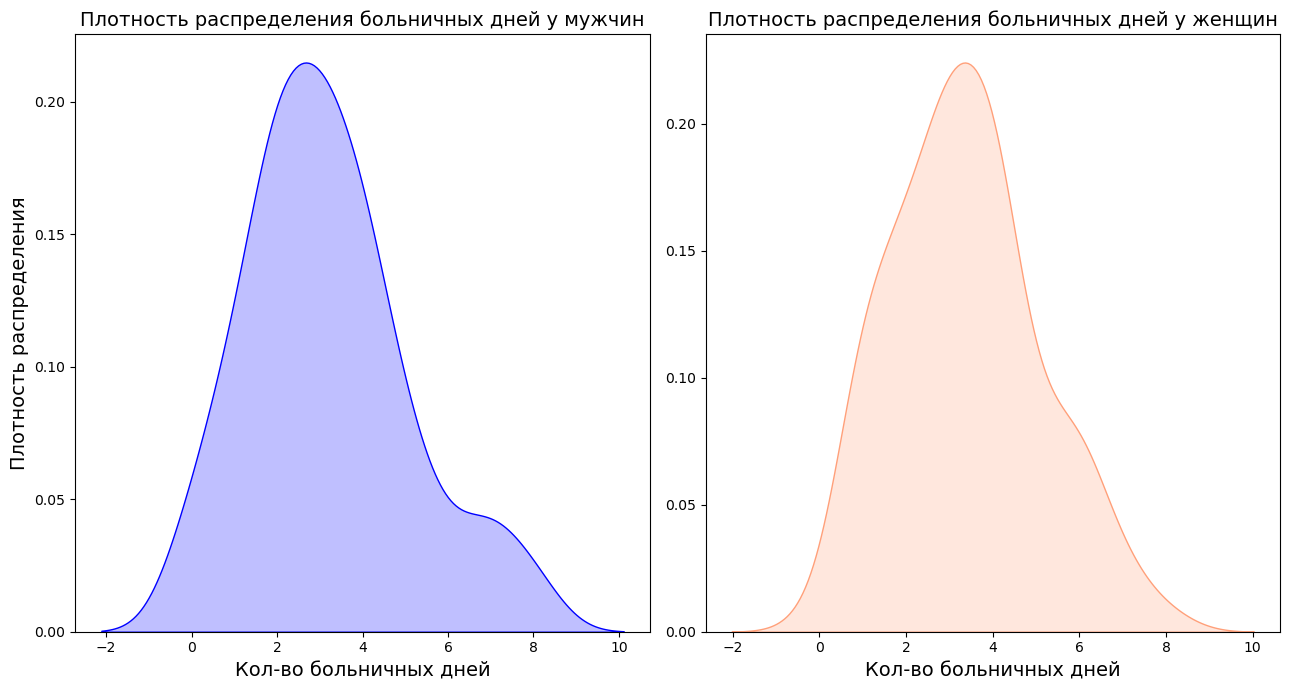

In [13]:
import seaborn as sns


# Создание графиков плотности распределения
date_for_male = data[data['Пол'] == '"М"']['Кол-во больничных дней']
date_for_female = data[data['Пол'] == '"Ж"']['Кол-во больничных дней']
plt.figure(figsize=(13, 7))
# Создание сетки 1x2 подграфиков
ax1 = plt.subplot(1, 2, 1)
sns.kdeplot(date_for_male, color='blue', fill=True)
plt.title('Плотность распределения больничных дней у мужчин', fontsize=14)
plt.ylabel('Плотность распределения', fontsize=14)
plt.xlabel('Кол-во больничных дней', fontsize=14)
ax2 = plt.subplot(1, 2, 2)
sns.kdeplot(date_for_female, color='lightsalmon', fill=True)
plt.title('Плотность распределения больничных дней у женщин',fontsize=14)
plt.ylabel('', fontsize=14)
plt.xlabel('Кол-во больничных дней', fontsize=14)
plt.tight_layout()

plt.show()
ax1.remove()
ax2.remove()


### По графикам видно - данные по количеству больничных дней отдельно для мужчин и женщин, распределены НЕ нормально

# Проверка 1-ой гипотезы:

## "Мужчины пропускают в течение года более 2 рабочих дней (work_days) по болезни значимо чаще женщин"

## Формулировка гипотез
### Нулевая гипотеза (H0): Среднее количество больничных дней в году среди мужчин, которые пропускают более 2 дней, равно среднему количеству больничных дней среди женщин, которые пропускают более 2 дней.
### Альтернативная гипотеза (H1): Среднее количество больничных дней в году среди мужчин, которые пропускают более 2 дней, больше, чем среднее количество больничных дней среди женщин, которые пропускают более 2 дней

### Сформулируем гипотезы на языке статистики:


## H₀: μₘ = μₓ
## H₁: μₘ > μₓ
### где μₘ - среднее количество больничных дней для выборки с мужчинами, μₓ - среднее количество больничных дней для выборки с женщинами.  
### Важно! для каждой выборки берутся только те данные, где количество больничных дней > 2_


In [14]:
#создание рассматриваемых выборок
date_for_male = data[data['Пол'] == '"М"']['Кол-во больничных дней']
date_for_female = data[data['Пол'] == '"Ж"']['Кол-во больничных дней']
data_men_filtered = date_for_male[date_for_male > 2] 
data_women_filtered = date_for_female[date_for_female > 2]

## Описательные стастистики рассматриваемых выборок:

In [15]:
data_men_filtered.describe() 

count    84.000000
mean      4.333333
std       1.475367
min       3.000000
25%       3.000000
50%       4.000000
75%       5.000000
max       8.000000
Name: Кол-во больничных дней, dtype: float64

In [16]:
data_women_filtered.describe()

count    67.000000
mean      4.238806
std       1.268375
min       3.000000
25%       3.000000
50%       4.000000
75%       5.000000
max       8.000000
Name: Кол-во больничных дней, dtype: float64

## Выбор уровня значимости и статистического критерия
### Уровень значимости (α) установим равным 0.05, это означает ,что есть 5% вероятность отклонения нулевой гипотезы, когда она на самом деле верна. 0.05 Общепринятное значние, уровень значимости можно уменьшить, но тогда будет расти вероятность принять нулевую гипотезу, когда на самом деле она неверна. В нашей ситуации нет острой надобности уменьшать вероятность непринятие нулевой гипотезы, когда она самом деле верна, в пользу увеличения вероятности принятия неверной нулевой гипотезы

## Статистический критерий: 
### Для этой гипотезы будем использовать двухвыборочный t-критерий Стьюдента. Этот критерий позволяет сравнить средние значения для двух независимых выборок. В наших гипотезах сраниваются средние количества больничных дней отдельно среди мужчин и отдельно среди женщин, которые пропускали более двух дней. Поэтому уместно использовать этот критерий

## Для использования двухвыборочного t-критерия Стьюдента, должны выполняться следующий условия:
### * Данные в выборках не должны зависеть друг от друга
### * Дисперсии каждой выборки должны быть равны
### * Данные в каждой выборки должны быть нормально распределены

## Первое условие выполняется данные данные в каждой из выборок независимы друг от друга (в одной выборке отдельно мужчины, в другой отдельно женщины). 
## Проверим оставшиеся два условия для применения t критерия Стьюдента

## Проверка на нормальность. Для проверки нормальности распределения данных можно использовать тест Шапиро-Уилка.
### Нулевая гипотеза (H0): данные распределенны нормально
### Альтернативная гипотеза (H1): данные распределенны не нормально
### Уровень значимости (α) установим равным 0.05

In [17]:
from scipy import stats 
#фильтрация данных, берем только те, где количество больничных дней > 2
data_men_filtered = date_for_male[date_for_male > 2] 
data_women_filtered = date_for_female[date_for_female > 2]


normality_test_men, p_value_male = stats.shapiro(data_men_filtered)
normality_test_women, p_value_female = stats.shapiro(data_women_filtered)


alpha = 0.05
if p_value_male > alpha:
    print("Нулевая гипотеза о нормальности распределения данных для выборки из мужчин не может быть отвергнута")
else:
    print("Нулевая гипотеза отвергается, данные из выборки из мужчин распределенны не нормально")
if p_value_female > alpha:
    print("Нулевая гипотеза о нормальности распределения данных для выборки из женщин не может быть отвергнута")
else:
    print("Нулевая гипотеза отвергается, данные из выборки из женщин распределенны не нормально")

Нулевая гипотеза отвергается, данные из выборки из мужчин распределенны не нормально
Нулевая гипотеза отвергается, данные из выборки из женщин распределенны не нормально


## Для обеих выборок данные распределенны не нормально. 
## Визуализация распределения данных:

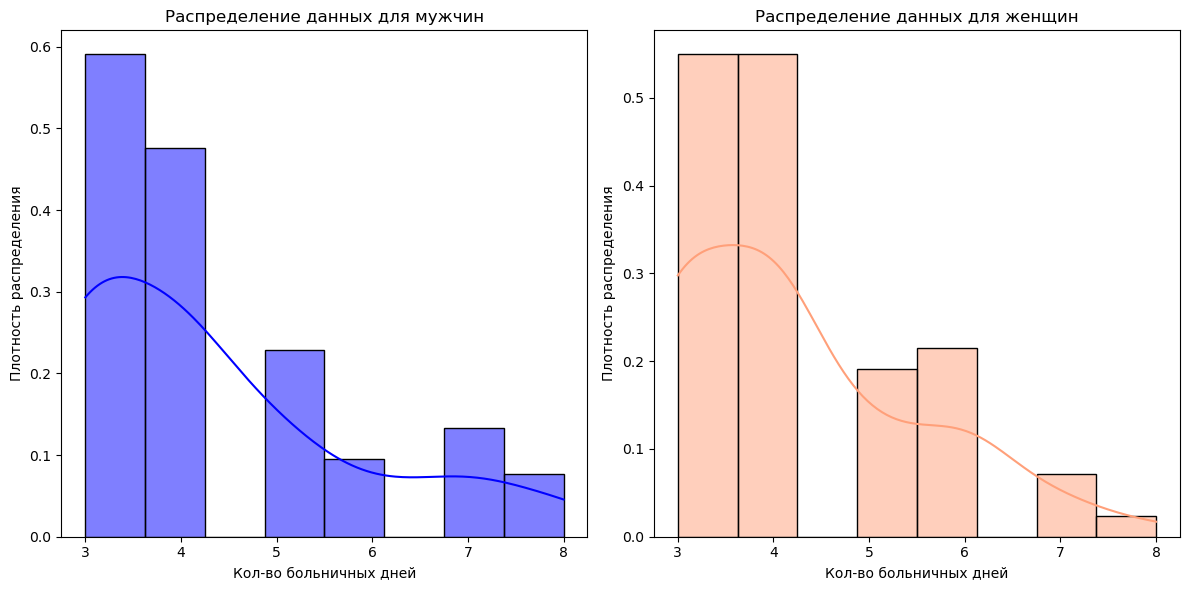

In [19]:
# Визуализация графиков распределений
plt.figure(figsize=(12, 6))

plt.subplot(1, 2, 1)
sns.histplot(data_men_filtered, kde=True, color='blue', stat='density')
plt.title('Распределение данных для мужчин')
plt.ylabel('Плотность распределения') 
plt.subplot(1, 2, 2)
sns.histplot(data_women_filtered, kde=True, color='lightsalmon', stat='density')
plt.title('Распределение данных для женщин')
plt.ylabel('Плотность распределения') 

plt.tight_layout()
plt.show()


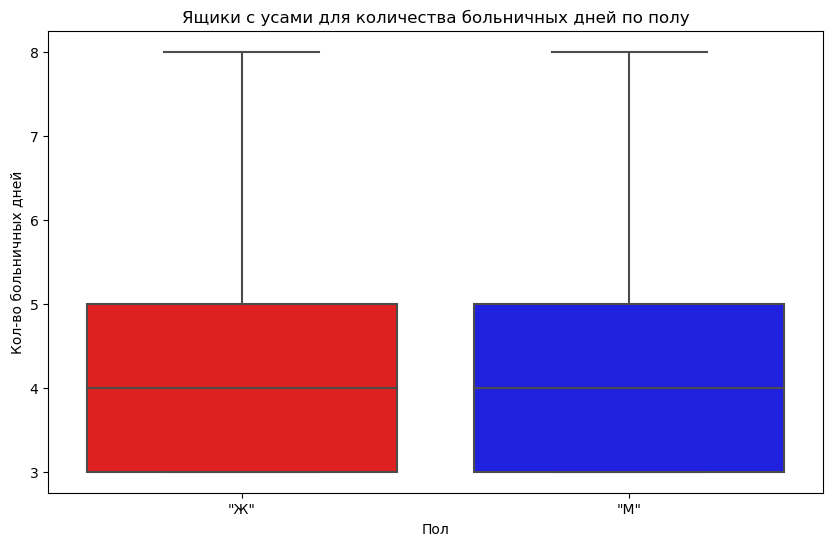

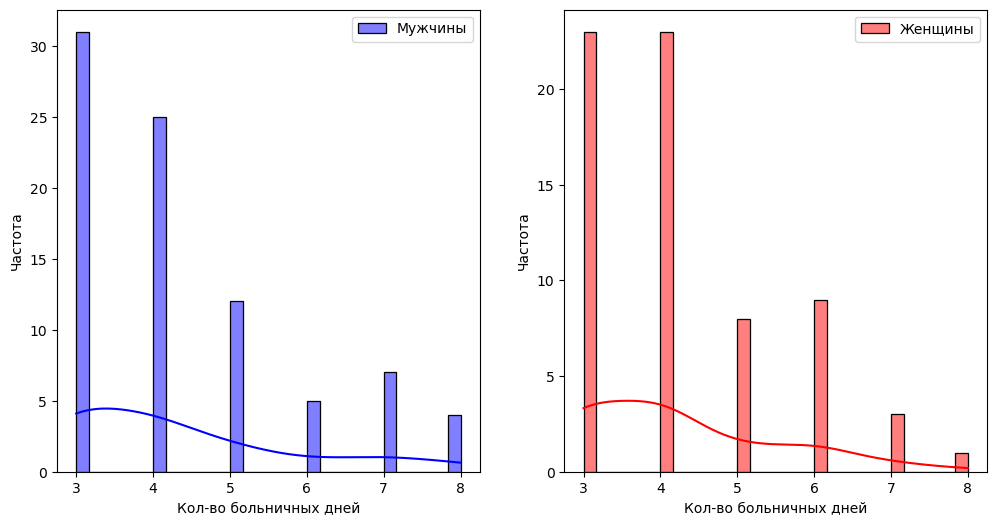

In [20]:
# Фильтрация данных
data_filtered = data[data['Кол-во больничных дней'] > 2]

# Создание двух ящиков с усами
plt.figure(figsize=(10, 6))
sns.boxplot(x='Пол', y='Кол-во больничных дней', data=data_filtered,  palette={'"М"': 'blue', '"Ж"': 'red'})
plt.xlabel('Пол')
plt.ylabel('Кол-во больничных дней')
plt.title('Ящики с усами для количества больничных дней по полу')
plt.show()

# Cоздани гистограмм
plt.figure(figsize=(12, 6))
plt.subplot(1, 2, 1)
sns.histplot(data_men_filtered, bins=30, kde=True, color='blue', label='Мужчины', common_norm=False)
plt.legend()
plt.ylabel('Частота')
plt.subplot(1, 2, 2)
sns.histplot(data_women_filtered, bins=30, kde=True, color='red', label='Женщины', common_norm=False)
plt.legend()
plt.xlabel('Кол-во больничных дней')
plt.ylabel('Частота')
plt.show()


### Графики передают много информации, например, медианы двух выборок равны. Ясно видно, что суммарно мужчины больше берут больничных дней, это из-за того, что выборки по объему не равны

### Дальнейшее применение t критерия Стьюдента затруднительно, нарушено условие нормальности распределенния данных в выборке. В таком случае можно применить непараметрический аналог t критерия Стьюдента  - U-критерий Манна — Уитни. Этот критерий не требует предположения о нормальности распределения данных. 
### Проведем тест Манна-Уитни.   

In [29]:
mann_whitney_test_result, p_value = stats.mannwhitneyu(data_men_filtered, data_women_filtered, alternative='greater')
print(f'Значение p_value: {p_value}')
if p_value < alpha:
    print("Отвергаем нулевую гипотезу")
else:
    print("Не отвергаем нулевую гипотезу")

Значение p_value: 0.4774086565269439
Не отвергаем нулевую гипотезу


### p_value ~ 0.48 значительно больше установленного ранее уровня значимости (0.05). 
## Значит нет достаточных оснований отвергнуть нулевую гипотезу, статистической разницы между двумя средними нет
# Вывод: На основе проведенного анализа, мы не находим статистически значимых доказательств того, что мужчины пропускают более двух рабочих дней по болезни в течение года значимо чаще, чем женщины, которые проускают более двух рабочих дней по болезни
# На уровне значимости: 0.05 нулевую гипотезу H₀: μₘ = μₓ принимаем

# Проверка 2-ой гипотезы 

## "Работники старше 35 лет (age) пропускают в течение года более 2 рабочих дней (work_days) по болезни значимо чаще своих более молодых коллег"

## Формулировка гипотез
### Нулевая гипотеза (H0): Среднее количество больничных дней среди работников старше 35 лет (берущих более двух больничных дней) равно среднему количеству больничных дней работников которым 35 лет и меньше  (берущих более двух больничных дней)
### Альтернативная гипотеза (H1): Среднее количество больничных дней среди работников старше 35 лет (берущих более двух больничных дней) значимо выше, чем среднее количество больничны дней работников, которым 35 лет и меньше (берущих более двух больничных дней).

## H0:μ старше 35 лет = μ моложе 36 лет
## H1:μ старше 35 лет > μ моложе 36 лет


### где "μ старше 35 лет" - среднее количество больничных дней для выборки c работниками, которые старше 35 лет, μ моложе 36 лет - среднее количество больничных дней для выборки с работниками, которые младше 36 лет.  
### Важно! для каждой выборки берутся только те данные, где количество больничных дней > 2

## Выбор уровня значимости и статистического критерия
### Уровень значимости (α) установим равным 0.05, это означает ,что есть 5% вероятность отклонения нулевой гипотезы, когда она на самом деле верна. 0.05 Общепринятное значние, уровень значимости можно уменьшить, но тогда будет расти вероятность принять нулевую гипотезу, когда на самом деле она неверна. В нашей ситуации нет острой надобности уменьшать вероятность непринятие нулевой гипотезы, когда она самом деле верна, в пользу увеличения вероятности принятия неверной нулевой гипотезы

In [22]:
#Создание рассматриваемых выборок
data_old = data[(data['Возраст'] > 35) & (data['Кол-во больничных дней'] > 2)]['Кол-во больничных дней']
data_young = data[(data['Возраст'] <= 35) & (data['Кол-во больничных дней'] > 2)]['Кол-во больничных дней']

## Описательные стастики:

In [23]:
data_old.describe()

count    115.000000
mean       4.243478
std        1.361058
min        3.000000
25%        3.000000
50%        4.000000
75%        5.000000
max        8.000000
Name: Кол-во больничных дней, dtype: float64

In [24]:
data_young.describe()

count    36.000000
mean      4.444444
std       1.462765
min       3.000000
25%       3.000000
50%       4.000000
75%       5.000000
max       8.000000
Name: Кол-во больничных дней, dtype: float64

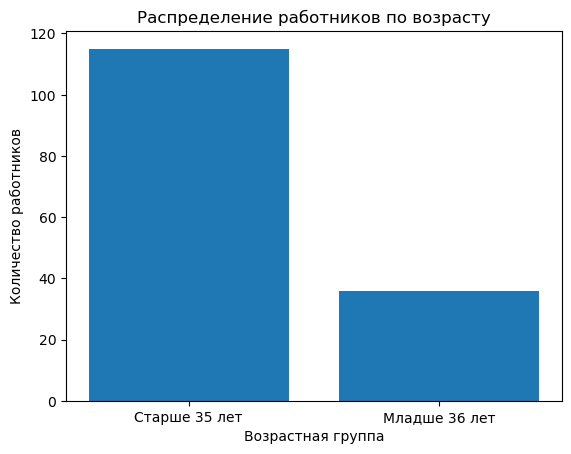

In [25]:

plt.bar(['Старше 35 лет', 'Младше 36 лет'], [len(data_old), len(data_young)])
plt.xlabel('Возрастная группа')
plt.ylabel('Количество работников')
plt.title('Распределение работников по возрасту')
plt.show()


## По графику не сложно заметить, что рассматриваемые выборки не разных объемов

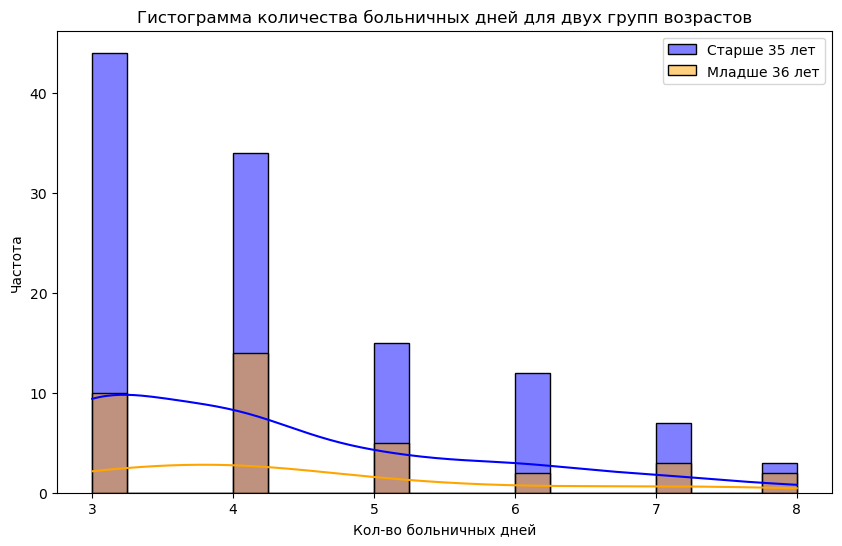

In [26]:
# Создание гистограммы
plt.figure(figsize=(10, 6))
sns.histplot(data_old, bins=20, kde=True, color='blue', label='Старше 35 лет')
sns.histplot(data_young, bins=20, kde=True, color='orange', label='Младше 36 лет')
plt.legend()
plt.xlabel('Кол-во больничных дней')
plt.ylabel('Частота')
plt.title('Гистограмма количества больничных дней для двух групп возрастов')
plt.show()


## Проверим нормальность распределения данных в выборках и равенство дисперсий, чтобы узнать можно ли применить t критерий Стьюдента

In [27]:
# Проверка нормальности распределения (тест Шапиро-Уилка)
normality_test_old, pvalue = stats.shapiro(data_old)
normality_test_young, pvalue1= stats.shapiro(data_young)

# Проверка гомогенности дисперсий (тест Левене)
levene_test = stats.levene(data_men_filtered, data_women_filtered)


pvalue, pvalue1, levene_test

(2.490216088890662e-10,
 5.530375710804947e-05,
 LeveneResult(statistic=0.8103200070081782, pvalue=0.36947824611612057))

### Вывод по значениям p_value при тестировани гипотез о нормальном распределении данных и о равенстве дисперский: нулевая гипотеза о нормальности распределения в выборках отклоняется --> данные в выборках не распределенны нормально. нулевая гипотеза о равенстве дисперсий принимается. дисперсии равны 

## Несмотря на то, что данные в выборка не распределенны нормально, это не означает, что нельзя применить t критерий Стьюдента, если каждая из выборок будет достаточно большой, то по ЦПТ распределение будет стремится к нормальному. Но в данной задаче лучше использовать другой статистический критерий. Ранее было расчитано, что объем выборки работников младше 36 лет составляет n = 36. В сравнение с другой выборкой это довольно малое значение. Поэтому лучше использовать другой статистический критерий, например, U-критерий Манна - Уитни, который хорошо работает на малых выборках и не требут нормального распределения данных

In [30]:
statistic, p_value = stats.mannwhitneyu(data_old, data_young, alternative='greater')


print(f'p-value: {p_value}')


alpha = 0.05
if p_value < alpha:
    print("Отвергаем нулевую гипотезу")
else:
    print("Не отвергаем нулевую гипотезу")


p-value: 0.7971402175825377
Не отвергаем нулевую гипотезу


### p_value ~ 0.8 значительно больше установленного ранее уровня значимости (0.05). 
## Значит нет достаточных оснований отвергнуть нулевую гипотезу, статистической разницы между двумя средними нет
# Вывод: На основе проведенного анализа, мы не находим статистически значимых доказательств того, что работники старше 35 лет пропускают более двух рабочих дней по болезни в течение года, значимо чаще, чем работники моложе 36 лет, которые пропускают более двух рабочих дней по болезни
# На уровне значимости: 0.05 нулевую гипотезу:
# H0:μ старше 35 лет = μ моложе 36 лет принимаем